In [1]:
%run precarga_datos_librerias.py
%run scripts/pandas_missing_extension.py

Probando la extension
      a    b
0     a  0.0
1     s  1.0
2  None  2.0
3  None  3.0
4  None  4.0
5     s  5.0
6     d  NaN
7     a  7.0
8     f  8.0
9     a  9.0
     Type  Streak
0      NA       2
1  Not NA       3
2  Not NA       5


/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:169: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:169: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:169: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:169: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_ext

# Eliminación de valores faltantes
Hay 2 formas fundamentales de lidiar con ellas. Eliminación de valores faltantes e Imputación de valores faltantes.

## Eliminación de valores faltantes
Advertencia: Trabajar con eliminación de valores faltantes __implica asumir que los valores faltantes están perdidos completamente al azar (MCAR).__ En cualquier otro caso, realizar una eliminación de valores faltantes podría ocasionar __sesgos__ en los análisis y modelos subsecuentes.





In [2]:
# Punto 1 - Revisar cuantas observaciones tiene
riskfactors.shape

(245, 34)

### Pairwise deletion (eliminación por pares)
Sólo se eliminan durante los cálculos de ciertas funciones.

In [6]:
(
    riskfactors
    .weight_lbs
    .count()
)

np.int64(235)

In [4]:
(
    riskfactors
    .weight_lbs
    .isna()
    .sum()
)

np.int64(10)

In [5]:
(
    riskfactors
    .weight_lbs
    .mean()
)

np.float64(174.26808510638298)

Las libterías en Python por defecto lo consideran así.
R requiere el parámetro na.rm=TRUE.

El mayor beneficio de este método es que no se pierden tantos datos, sin embargo si hay gran cantidad de observaciones ignoradas, podríamos estar introduciendo algún sesgo a los datos.

Al mantener el mayor número de datos se convierte en el preferido.

Evitar el comportamiento:

In [8]:
riskfactors.select_dtypes(exclude="category").mean(skipna=False)

age                58.106122
weight_lbs               NaN
height_inch              NaN
bmi                      NaN
children             0.42449
health_physical     4.118367
health_mental       3.142857
health_poor              NaN
drink_days               NaN
drink_average            NaN
diet_fruit               NaN
diet_salad               NaN
diet_potato              NaN
diet_carrot              NaN
diet_vegetable           NaN
diet_juice               NaN
dtype: object

El resultado de no omitir NAs es un valor faltante.

### Listwise Deletion or Complete Case (Eliminación por lista o caso completo)

In [10]:
(
    riskfactors
    .dropna(
        # Si hay un valor faltante en estas variables, el caso completo se elimina
        subset=["weight_lbs"],
        how="any"
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


In [11]:
(
    riskfactors
    .dropna(
        # Si hay un valor faltante en estas variables, el caso completo se elimina
        subset=["weight_lbs"],
        how="any"
    ).shape
)

(235, 34)

Como puede observarse, se han perdido 10 casos.

### Con base en más variables

#### Full inner join

In [12]:
(
    riskfactors
    .dropna(
        # Si hay un valor faltante en estas variables, el caso completo se elimina
        subset=["weight_lbs", "height_inch"],
        how="any"
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


#### Full outer join

Sólo se descartan casos donde faltan ambas variables.

In [13]:
(
    riskfactors
    .dropna(
        # Si hay un valor faltante en estas variables, el caso completo se elimina
        subset=["weight_lbs", "height_inch"],
        how="all"
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


/home/changery/Platzi/016-Manejo_de_NAs/env/lib64/python3.12/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


<Axes: >

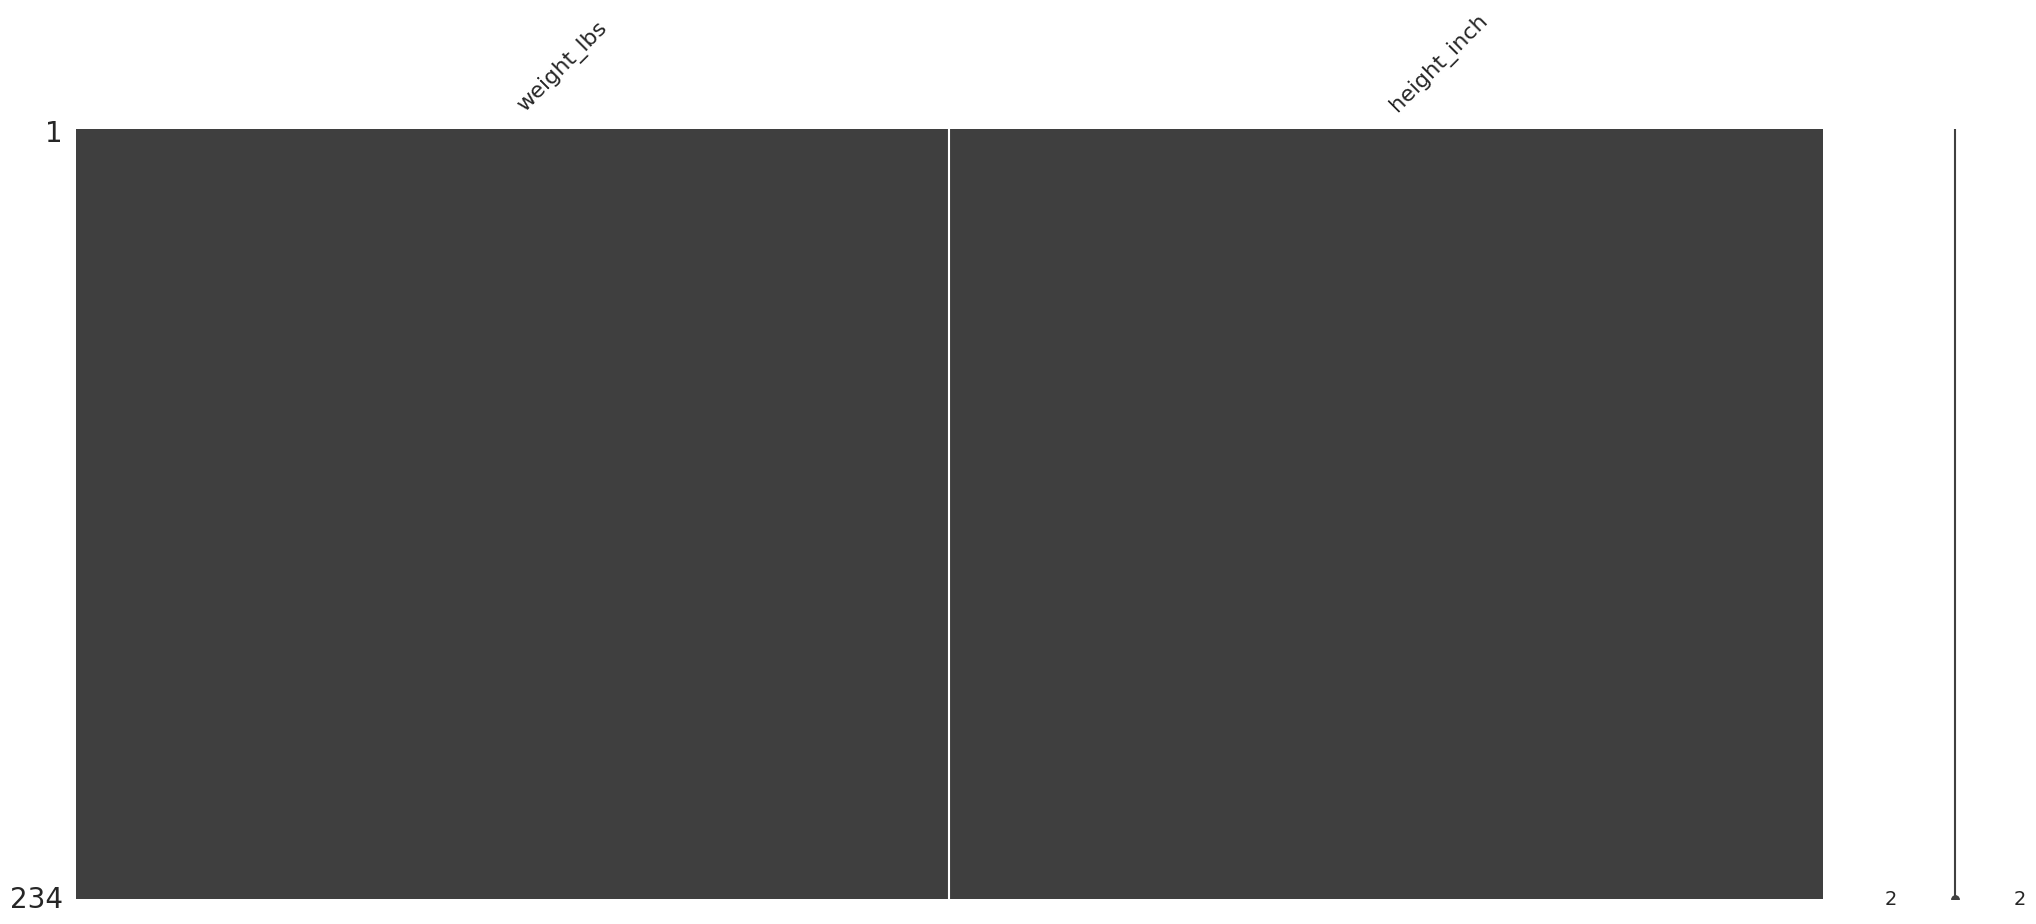

In [17]:
# Representación gráfica
(
    riskfactors
    .dropna(
        # Si hay un valor faltante en estas variables, el caso completo se elimina
        subset=["weight_lbs", "height_inch"],
        how="any"
    )
    .select_columns(["weight_lbs", "height_inch"])
    .pipe(
        missingno.matrix
    )
)

/home/changery/Platzi/016-Manejo_de_NAs/env/lib64/python3.12/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


<Axes: >

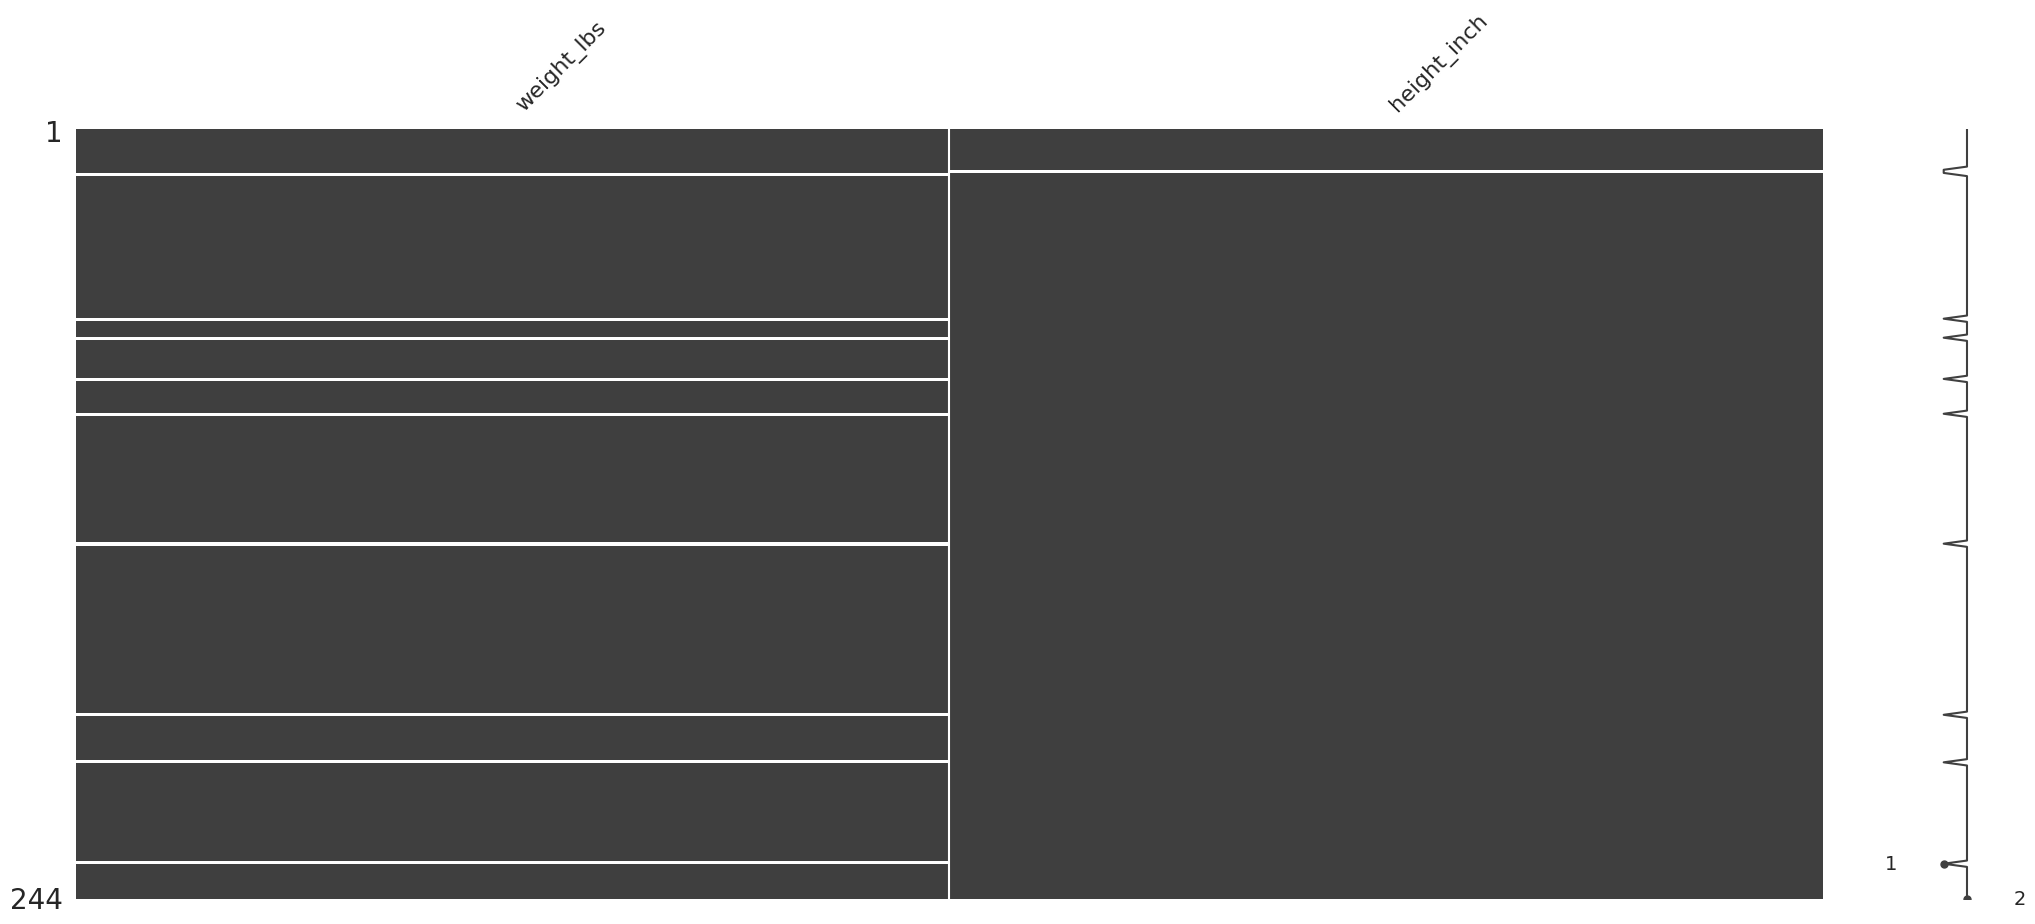

In [15]:
# Representación gráfica
(
    riskfactors
    .dropna(
        # Si hay un valor faltante en estas variables, el caso completo se elimina
        subset=["weight_lbs", "height_inch"],
        how="all"
    )
    .select_columns(["weight_lbs", "height_inch"])
    .pipe(
        missingno.matrix
    )
)

## Imputación de valores faltantes

Reemplazar valores faltantes por algún otro valor, estadístico, por contexto, por un modelo de ML que prediga estos valores faltantes.

### Imputación básica de valores faltantes con base en el contexto

Nosotros sabemos algo de cómo fueron recopilados los datos o la estructura de los datos que por consiguiente nos permite completar las entradas vacías.

In [23]:
exm_df = pd.DataFrame.from_dict(dict(
    name = ["Lynn", np.nan, "Zelda", np.nan, "Shadowsong", np.nan],
    time = ["morining", "afternoon"] * 3,
    value = [350, 310, 320, 350, 310, 320]
))
exm_df

,name,time,value
0,Lynn,morining,350
1,NaN,afternoon,310
2,Zelda,morining,320
3,NaN,afternoon,350
4,Shadowsong,morining,310
5,NaN,afternoon,320


En el ejemplo anterior, observamos que los valores faltantes se deben a que se omitió la repetición de los valores del nombre. Una situación muy común al trabajar con spreadsheets.

In [25]:
exm_df.ffill()

,name,time,value
0,Lynn,morining,350
1,Lynn,afternoon,310
2,Zelda,morining,320
3,Zelda,afternoon,350
4,Shadowsong,morining,310
5,Shadowsong,afternoon,320


En este momento el conjunto de datos está completo.

### Imputar un valor a partir de un estadístico.

In [28]:
(
    riskfactors
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(
        false_NA_value = False,
        true_NA_value = True
    )
    .apply(
        axis = "rows",
        func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column
    )
)

/home/changery/Platzi/016-Manejo_de_NAs/env/lib64/python3.12/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)
/tmp/ipykernel_123280/342585302.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column


,weight_lbs,height_inch,bmi,weight_lbs_NA,height_inch_NA,bmi_NA
0,190.0,64.0,32.68,False,False,False
1,170.0,68.0,25.90,False,False,False
2,163.0,64.0,28.04,False,False,False
3,230.0,74.0,29.59,False,False,False
4,135.0,62.0,24.74,False,False,False
...,...,...,...,...,...,...
240,144.0,63.0,25.56,False,False,False
241,170.0,74.0,21.87,False,False,False
242,175.0,71.0,24.46,False,False,False
243,138.0,64.0,23.74,False,False,False


In [31]:
(
    riskfactors
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(
        false_NA_value = False,
        true_NA_value = True
    )
    .apply(
        axis = "rows",
        func = lambda column : column.fillna(column.median()) if "_NA" not in column.name else column
    )
)

/home/changery/Platzi/016-Manejo_de_NAs/env/lib64/python3.12/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)
/tmp/ipykernel_123280/267983804.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  func = lambda column : column.fillna(column.median()) if "_NA" not in column.name else column
/tmp/ipykernel_123280/267983804.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  func = lambda column : column.fillna(column.medi

,weight_lbs,height_inch,bmi,weight_lbs_NA,height_inch_NA,bmi_NA
0,190.0,64.0,32.68,False,False,False
1,170.0,68.0,25.90,False,False,False
2,163.0,64.0,28.04,False,False,False
3,230.0,74.0,29.59,False,False,False
4,135.0,62.0,24.74,False,False,False
...,...,...,...,...,...,...
240,144.0,63.0,25.56,False,False,False
241,170.0,74.0,21.87,False,False,False
242,175.0,71.0,24.46,False,False,False
243,138.0,64.0,23.74,False,False,False


/home/changery/Platzi/016-Manejo_de_NAs/env/lib64/python3.12/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)
/tmp/ipykernel_123280/3904428991.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column


<Axes: xlabel='weight_lbs', ylabel='Count'>

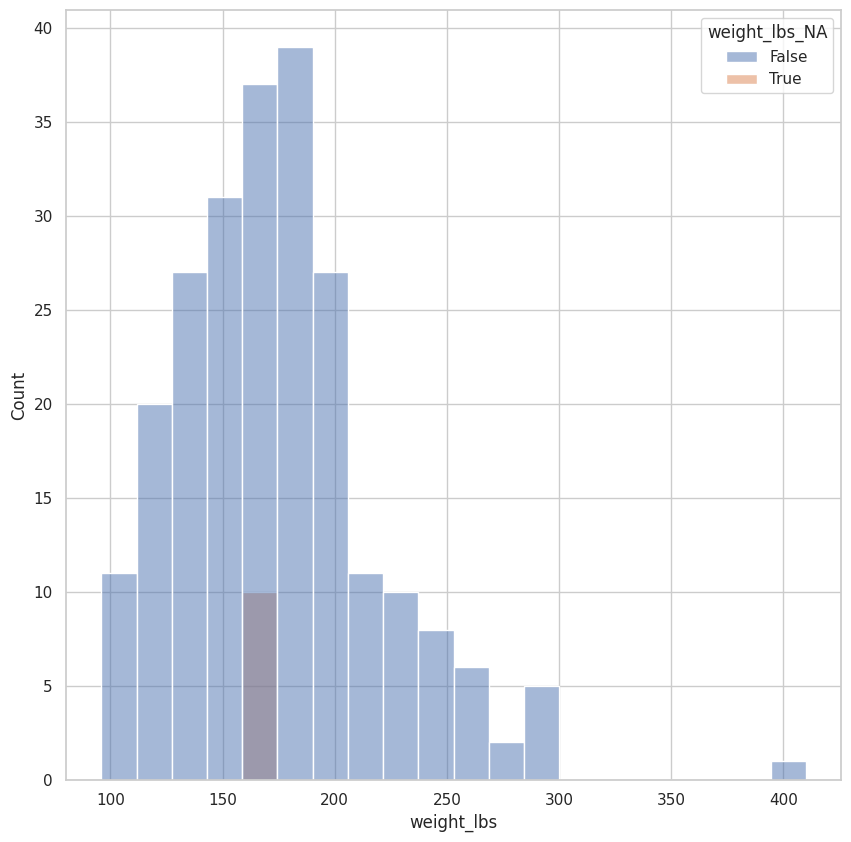

In [33]:
(
    riskfactors
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(
        false_NA_value = False,
        true_NA_value = True
    )
    .apply(
        axis = "rows",
        func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .pipe(
        lambda df : sns.histplot(
            data = df,
            x = "weight_lbs",
            hue = "weight_lbs_NA"
        )
    )
)

En el histograma anterior, en color azul vemos los valores reales que teníamos, y de naranja los valores que se acaban de inputar, en este caso todos caen en el promedio.

### Imputar en relación a otra variable

In [35]:
(
    riskfactors
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(
        false_NA_value = False,
        true_NA_value = True
    )
    .apply(
        axis = "rows",
        func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        imputed=lambda df : df.weight_lbs_NA | df.height_inch_NA
    )
)

/home/changery/Platzi/016-Manejo_de_NAs/env/lib64/python3.12/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)
/tmp/ipykernel_123280/2402952931.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column


,weight_lbs,height_inch,bmi,weight_lbs_NA,height_inch_NA,bmi_NA,imputed
0,190.0,64.0,32.68,False,False,False,False
1,170.0,68.0,25.90,False,False,False,False
2,163.0,64.0,28.04,False,False,False,False
3,230.0,74.0,29.59,False,False,False,False
4,135.0,62.0,24.74,False,False,False,False
...,...,...,...,...,...,...,...
240,144.0,63.0,25.56,False,False,False,False
241,170.0,74.0,21.87,False,False,False,False
242,175.0,71.0,24.46,False,False,False,False
243,138.0,64.0,23.74,False,False,False,False


Lo anterior indica si un valor ha sido imputado o no respecto a cualquier reemplazo previamente indicado, en este caso, peso o altura.

/home/changery/Platzi/016-Manejo_de_NAs/env/lib64/python3.12/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)
/tmp/ipykernel_123280/4174614846.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column


<Axes: xlabel='weight_lbs', ylabel='height_inch'>

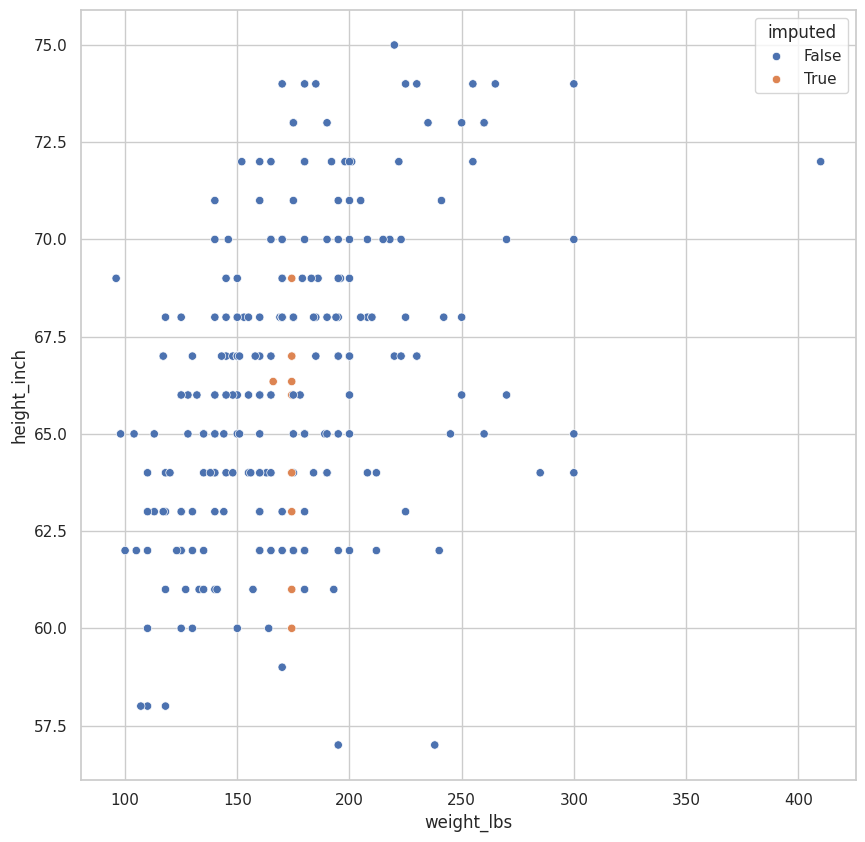

In [36]:
(
    riskfactors
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(
        false_NA_value = False,
        true_NA_value = True
    )
    .apply(
        axis = "rows",
        func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        imputed=lambda df : df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: sns.scatterplot(
            data = df,
            x = "weight_lbs",
            y = "height_inch",
            hue = "imputed"
        )
    )
)

In [ ]:
La imagen muestra dónde han sido colocados los valores imputados, hay que verificar que la imputación no haya 